In [1]:
# 1. Importing the Necessary Modules

import numpy as np
import nltk
import networkx as nx
from collections import Counter
from itertools import combinations
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# 2. Defining the TextRank Approach

def textrank_keywork(text, top_n):
    stopwords = set(nltk_stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stopwords]

    graph = nx.Graph()
    graph.add_nodes_from(set(words))

    for w1, w2 in combinations(words, 2):
        if w1 != w2:
            graph.add_edge(w1, w2)

    plt.figure(figsize=(12, 8))
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, edge_color='gray')
    plt.title("TextRank Keyword Graph")
    plt.show()

    scores = nx.pagerank(graph)
    keywords = sorted(scores, key=scores.get, reverse=True)
    top_keywords = keywords[:top_n]
    return top_keywords

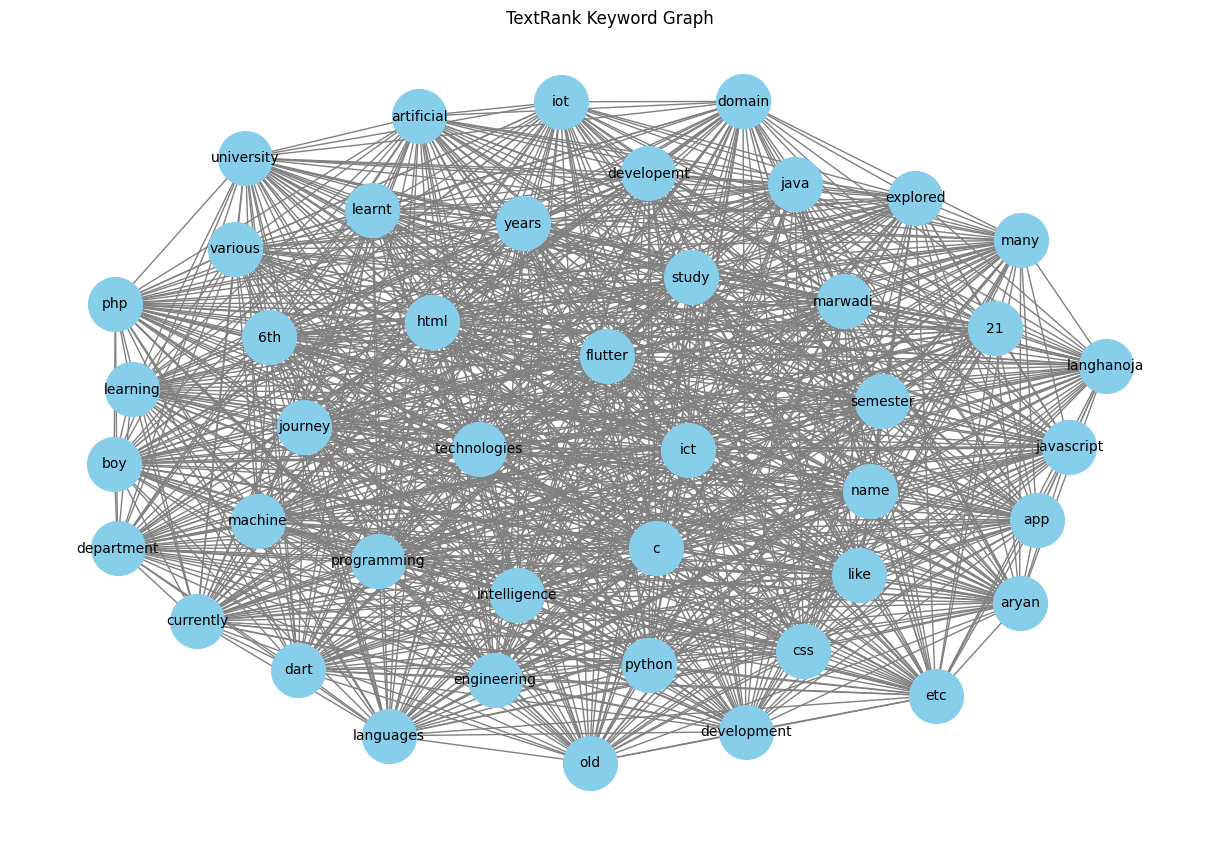

['domain',
 'development',
 'study',
 'java',
 'html',
 'developemt',
 'aryan',
 'boy',
 'years',
 'css',
 '6th',
 'marwadi',
 'semester',
 'python',
 'currently',
 'explored',
 'intelligence',
 'app',
 'artificial',
 'javascript',
 'many',
 'like',
 'flutter',
 'ict',
 'department']

In [3]:
# 3. Applyling over the Text

text = "My name is Aryan Langhanoja. I am a 21 years old boy. I am currently study in marwadi university in ICT department in the 6th semester. in my 2.5 years of engineering journey i had explored various domain like IoT, we development , app development , machine  learning , artificial intelligence , i had learnt many developemt technologies like HTML , CSS , JavaScript , React.js  , node.js , Express.js , Flutter, php . i had  various programming languages like c , c++ , java , python , php , dart , javascript etc. "
top_words = textrank_keywork(text, 25)
top_words

In [4]:
# 3. Categorizing the keywords
real_idea = []
not_real_idea = []
irrelevant = []

real_keywords = ["io" , "web" , "development" , "app", "machine" , "learning" , "artificial" ,  "intelligence" , "html" , "css" , "javascript" , "react.js"  , "node.js" , "express.js" , "flutter", "php" , "c" , "c++" , "java" , "python" , "php" , "dart" , "javascript"]
irrelevant_keywords = ["name", "years", "old", "boy", "study" , "department" , "semester" , "journey" , "explored" , "various" , "domains" , "like"]


In [5]:
# 3. Implement the Categorizing the keywords

for word in top_words:
    if word in real_keywords:
        real_idea.append(word)
    elif word in irrelevant_keywords:
        irrelevant.append(word)
    else:
        not_real_idea.append(word)


In [6]:
# 4 . Display results
print("\nTop 25 Keywords:")
print(top_words)

print("\nKeywords Giving the Real Idea:")
print(real_idea)

print("\nKeywords Not Giving the Real Idea:")
print(not_real_idea)

print("\nIrrelevant Keywords:")
print(irrelevant)


Top 25 Keywords:
['domain', 'development', 'study', 'java', 'html', 'developemt', 'aryan', 'boy', 'years', 'css', '6th', 'marwadi', 'semester', 'python', 'currently', 'explored', 'intelligence', 'app', 'artificial', 'javascript', 'many', 'like', 'flutter', 'ict', 'department']

Keywords Giving the Real Idea:
['development', 'java', 'html', 'css', 'python', 'intelligence', 'app', 'artificial', 'javascript', 'flutter']

Keywords Not Giving the Real Idea:
['domain', 'developemt', 'aryan', '6th', 'marwadi', 'currently', 'many', 'ict']

Irrelevant Keywords:
['study', 'boy', 'years', 'semester', 'explored', 'like', 'department']
